In [1]:
import numpy as np
import os
from collections import OrderedDict
from scipy.io import wavfile
import re
import pickle as pkl

import tables
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def correct_pos(pos):
    if pos == 0:
        pos = 1
    if pos == 18:
        pos = 17
    return pos

In [ ]:
basedir = '/Volumes/Elements/TIDIGITS/'
mtr = 'CD1/TIDIGITS/TRAIN/MAN/'
ftr = 'CD1/TIDIGITS/TRAIN/WOMAN/'
mte = 'CD2/TIDIGITS/TEST/MAN/'
fte = 'CD2/TIDIGITS/TEST/WOMAN/'

old_separator = '/'
new_separator = '\\'

D = {'train': {'m': {}, 'f': {}}, 'test': {'m': {}, 'f': {}}}
for path, task, gender in zip([mtr, ftr, mte, fte], ['train', 'train', 'test', 'test'], ['m', 'f', 'm', 'f']):
    _list = [i for i in os.listdir(basedir + path)if len(i) == 2]
    for spk in _list:
        _wavs = [i for i in os.listdir(basedir + path + spk + '/') if "WAV" in i]
        D[task][gender][spk] = [path + spk + '/' + i for i in _wavs]

to_digit = {'O': 0,'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'Z': 0}

In [ ]:
n_samples = 6000
with open('train_set.txt', 'w') as wavs:
    for i in range(n_samples):
        rnd_gnd1 = np.random.choice(['m', 'f'])
        rnd_spk1 = np.random.choice(D['train'][rnd_gnd1].keys())
        rnd_wav1 = np.random.choice(D['train'][rnd_gnd1][rnd_spk1])
        
        rnd_gnd2 = np.random.choice(['m', 'f'])
        rnd_spk2 = np.random.choice(D['train'][rnd_gnd2].keys())
        rnd_wav2 = np.random.choice(D['train'][rnd_gnd2][rnd_spk2])
        
        ann1 = "".join([str(to_digit[i]) for i in rnd_wav1.split('/')[-1][:-5]])
        ann2 = "".join([str(to_digit[i]) for i in rnd_wav2.split('/')[-1][:-5]])
        nn = rnd_spk1 + ann1 + rnd_spk2 + ann2
        wavs.write(rnd_wav1.replace(old_separator, new_separator) + ' ' + rnd_wav2.replace(old_separator, new_separator) + ' ' + ann1 + ' ' + ann2 + ' ' + nn +'\n')
        
        
    

In [ ]:
n_samples = 2000
with open('test_set.txt', 'w') as wavs:
    for i in range(n_samples):
        rnd_gnd1 = np.random.choice(['m', 'f'])
        rnd_spk1 = np.random.choice(D['test'][rnd_gnd1].keys())
        rnd_wav1 = np.random.choice(D['test'][rnd_gnd1][rnd_spk1])
        
        rnd_gnd2 = np.random.choice(['m', 'f'])
        rnd_spk2 = np.random.choice(D['test'][rnd_gnd2].keys())
        rnd_wav2 = np.random.choice(D['test'][rnd_gnd2][rnd_spk2])
        
        ann1 = "".join([str(to_digit[i]) for i in rnd_wav1.split('/')[-1][:-5]])
        ann2 = "".join([str(to_digit[i]) for i in rnd_wav2.split('/')[-1][:-5]])
        
        nn = rnd_spk1 + ann1 + rnd_spk2 + ann2
        
        wavs.write(rnd_wav1.replace(old_separator, new_separator) + ' ' + rnd_wav2.replace(old_separator, new_separator) + ' ' + ann1 + ' ' + ann2 + ' ' + nn + '\n')
        

In [ ]:
# log_mix
with open('train_set.txt', 'r') as wavs, open('description_log_mix.csv', 'w') as csv, open('test_set.txt', 'r') as wavs_t:
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for l in wavs.readlines():
        _, utt1, utt2 = re.compile('[A-Z]+').split(l.split(' ')[-1])
        
        csv.write('default,train,audio,train_{},1,'.format(count))
        csv.write('train/' + l.split(' ')[-1].strip() + '.wav,')
        csv.write(utt1.replace('0', 'Z') + utt2.replace('0', 'Z'))
        count += 1
    
    count = 0
    for l in wavs_t.readlines():
        _, utt1, utt2 = re.compile('[A-Z]+').split(l.split(' ')[-1])
        
        csv.write('default,test,audio,test_{},1,'.format(count))
        csv.write('test/' + l.split(' ')[-1].strip() + '.wav,')
        csv.write(utt1.replace('0', 'Z') + utt2.replace('0', 'Z'))
        count += 1

        

In [ ]:
# separated original fbank of only the registered ones
with open('train_set.txt', 'r') as wavs, open('description_sep_log.csv', 'w') as csv, open('test_set.txt', 'r') as wavs_t:
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for l in wavs.readlines():
        utt1, utt2 = l.split(' ')[2], l.split(' ')[3]
        
        csv.write('default,train,audio,train_{},1,'.format(count))
        csv.write('train/' + l.split(' ')[0].strip().replace('\\', '/') + '.wav,')
        csv.write(utt1.replace('0', 'Z') + '\n')
        count += 1
        
        csv.write('default,train,audio,train_{},1,'.format(count))
        csv.write('train/' + l.split(' ')[1].strip().replace('\\', '/') + '.wav,')
        csv.write(utt2.replace('0', 'Z') + '\n')
        count += 1
    
    count = 0
    for l in wavs_t.readlines():
        utt1, utt2 = l.split(' ')[2], l.split(' ')[3]
        
        csv.write('default,test,audio,test_{},1,'.format(count))
        csv.write('test/' + l.split(' ')[0].strip().replace('\\', '/') + '.wav,')
        csv.write(utt1.replace('0', 'Z') + '\n')
        count += 1
        
        csv.write('default,test,audio,test_{},1,'.format(count))
        csv.write('test/' + l.split(' ')[1].strip().replace('\\', '/') + '.wav,')
        csv.write(utt2.replace('0', 'Z') + '\n')
        count += 1

        

In [ ]:
# mixed spike fuatures
with open('description_spk_mix.csv', 'w') as csv, open('train_set.txt', 'r') as wavs, open('test_set.txt', 'r') as wavs_t:
    
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for l in wavs.readlines():
        utt1, utt2 = l.split(' ')[2], l.split(' ')[3]
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, utt1.replace('0', 'Z') + utt2.replace('0', 'Z')))
        count += 1
        
    count = 0
    for l in wavs_t.readlines():
        utt1, utt2 = l.split(' ')[2], l.split(' ')[3]
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, utt1.replace('0', 'Z') + utt2.replace('0', 'Z')))
        count += 1

In [21]:
# separated spike features
basedir = '/Data/DATASETS/CAESAR_TIDIGITS/'
data_train = pkl.load(open('all_sep_spk_train.pkl', 'r'))
data_test = pkl.load(open('all_sep_spk_test.pkl', 'r'))
ALL_ANGLES = {}

with open('description_spk_sep.csv', 'w') as csv:
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(data_train['lbl']):
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1
        
    count = 0
    for i, l in enumerate(data_test['lbl']):
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1

# filter for same position or adjacient position

with open(basedir + 'log_train.txt') as t:
    ALL_ANGLES['train'] = [x for x in t.readlines()]

with open(basedir + 'log_test.txt') as t:
    ALL_ANGLES['test'] = [x for x in t.readlines()]

with open('description_spk_sep_noADJ.csv', 'w') as csv:
    to_do_train = []
    for l in ALL_ANGLES['train']:
        pos1, pos2 = int(float(l.split(' ')[1]) // 10) , int(float(l.split(' ')[2]) // 10)
        pos1, pos2 = correct_pos(pos1), correct_pos(pos2)
        if np.abs(pos1 - pos2) > 1:
            to_do_train.append(True)
            to_do_train.append(True)
        else:
            to_do_train.append(False)
            to_do_train.append(False)
            
    to_do_test = []
    for l in ALL_ANGLES['test']:
        pos1, pos2 = int(float(l.split(' ')[1]) // 10) , int(float(l.split(' ')[2]) // 10)
        pos1, pos2 = correct_pos(pos1), correct_pos(pos2)
        if np.abs(pos1 - pos2) > 1:
            to_do_test.append(True)
            to_do_test.append(True)
        else:
            to_do_test.append(False)
            to_do_test.append(False)
        
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(data_train['lbl']):
        if to_do_train[i]:
            csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1

    count = 0
    for i, l in enumerate(data_test['lbl']):
        if to_do_test[i]:
            csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1

In [10]:
# projected spike features
data_train = pkl.load(open('all_log_prj_train.pkl', 'r'))
data_test = pkl.load(open('all_log_prj_test.pkl', 'r'))

with open('description_log_prj.csv', 'w') as csv:
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(data_train['lbl']):
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1
        
    count = 0
    for i, l in enumerate(data_test['lbl']):
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1

In [ ]:
import tables
h5file = '/Data/Dropbox/tidigits_kaldi_fbank.h5'

h5 = tables.open_file(h5file, 'r')
dataset = h5.get_node(os.path.join(os.sep, 'default', 'train'))

channels = h5.list_nodes(os.path.join(os.sep, 'default', 'train'))

print len(channels[0].features)
print channels[0].label[0]
print channels[0].label_length[0]

In [ ]:
import tables
import os
h5file = '/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_sep.h5'

h5 = tables.open_file(h5file, 'r')
dataset = h5.get_node(os.path.join(os.sep, 'default', 'train'))

channels = h5.list_nodes(os.path.join(os.sep, 'default', 'train'))

print len(channels[0].features)
print channels[0].label[1]
print channels[0].label_length[1]

3998
1999
3998
1999
3998
===
[5 1 0 9]
[6 6 0 9 6]
[5 1 0 9 6 6 0 9 6]
[5 1 0 9]
[6 6 0 9 6]
[5 1 0 9 6 6 0 9 6]
[5 1 0 9]
[6 6 0 9 6]


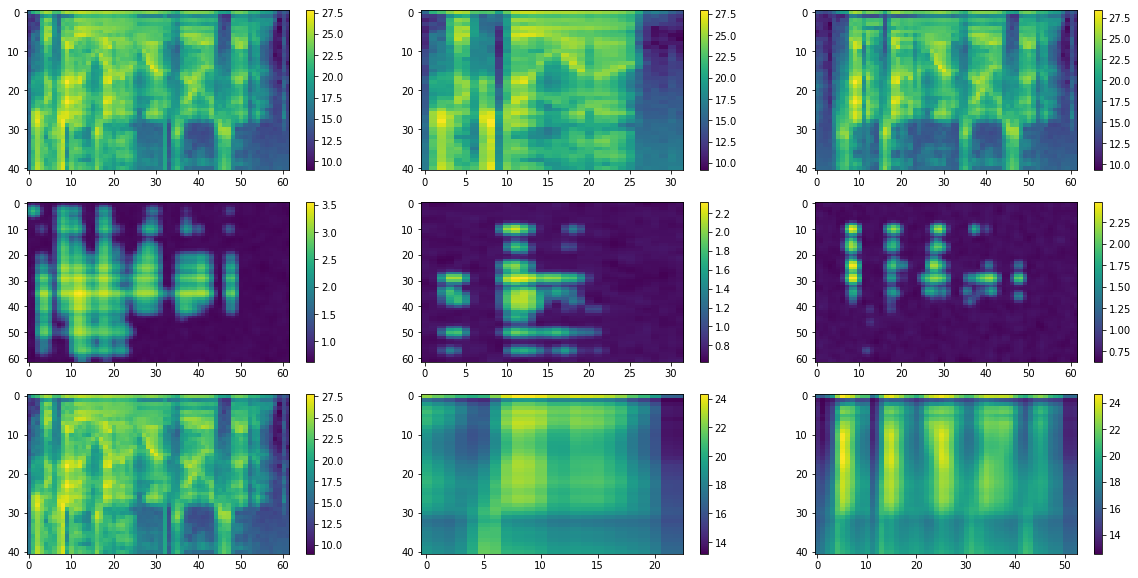

In [26]:
subset = 'test'
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_sep.h5', 'r')
log_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_mix.h5', 'r')
log_mix = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_sep.h5', 'r')
spk_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_mix.h5', 'r')
spk_mix = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_prj.h5', 'r')
log_prj = h5.list_nodes(os.path.join(os.sep, 'default', subset))

print len(log_sep[0].features)
print len(log_mix[0].features)
print len(spk_sep[0].features)
print len(spk_mix[0].features)
print len(log_prj[0].features)

IDX = 1002
print "==="
print log_sep[0].label[IDX * 2]
print log_sep[0].label[IDX * 2 + 1]
print log_mix[0].label[IDX]
print spk_sep[0].label[IDX * 2]
print spk_sep[0].label[IDX * 2 + 1]
print spk_mix[0].label[IDX]
print log_prj[0].label[IDX * 2]
print log_prj[0].label[IDX * 2 + 1]

f, ax = plt.subplots(3, 3, figsize=(20,10))
a = ax[0][0].imshow(np.reshape(log_mix[0].features[IDX], log_mix[0].feature_shape[IDX])[:, :41].T, aspect='auto')
plt.colorbar(a, ax=ax[0][0])
a = ax[0][1].imshow(np.reshape(log_sep[0].features[IDX * 2], log_sep[0].feature_shape[IDX * 2])[:, :41].T, aspect='auto')
plt.colorbar(a, ax=ax[0][1])
a = ax[0][2].imshow(np.reshape(log_sep[0].features[IDX * 2 + 1], log_sep[0].feature_shape[IDX * 2 + 1])[:, :41].T, aspect='auto')
plt.colorbar(a, ax=ax[0][2])
a = ax[1][0].imshow(np.reshape(spk_mix[0].features[IDX], spk_mix[0].feature_shape[IDX]).T, aspect='auto')
plt.colorbar(a, ax=ax[1][0])
a = ax[1][1].imshow(np.reshape(spk_sep[0].features[IDX * 2], spk_sep[0].feature_shape[IDX * 2]).T, aspect='auto')
plt.colorbar(a, ax=ax[1][1])
a = ax[1][2].imshow(np.reshape(spk_sep[0].features[IDX * 2 + 1], spk_sep[0].feature_shape[IDX * 2 + 1]).T, aspect='auto')
plt.colorbar(a, ax=ax[1][2])

a = ax[2][0].imshow(np.reshape(log_mix[0].features[IDX], log_mix[0].feature_shape[IDX])[:, :41].T, aspect='auto')
plt.colorbar(a, ax=ax[2][0])
a = ax[2][1].imshow(np.reshape(log_prj[0].features[IDX * 2], log_prj[0].feature_shape[IDX * 2]).T, aspect='auto')
plt.colorbar(a, ax=ax[2][1])
a = ax[2][2].imshow(np.reshape(log_prj[0].features[IDX * 2 + 1], log_prj[0].feature_shape[IDX * 2 + 1]).T, aspect='auto')
plt.colorbar(a, ax=ax[2][2])

In [25]:
subset = 'train'
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_sep.h5', 'r')
log_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_mix.h5', 'r')
log_mix = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_sep.h5', 'r')
spk_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_mix.h5', 'r')
spk_mix = h5.list_nodes(os.path.join(os.sep, 'default', subset))

for IDX in range(8000):
    if not list(spk_sep[0].label[IDX // 2 * 2]) + list(spk_sep[0].label[IDX // 2 * 2 + 1]) == list(spk_mix[0].label[IDX // 2]):
    #         print "{} vs {}".format(spk_sep[0].feature_shape[IDX][0], log_sep[0].feature_shape[IDX][0])
        print "SPK {}: {} // {} // {}".format(IDX // 2, spk_sep[0].label[IDX // 2 * 2], spk_sep[0].label[IDX // 2 * 2 + 1], spk_mix[0].label[IDX // 2])
        print "LOG {}: {} // {} // {}".format(IDX // 2, log_sep[0].label[IDX // 2 * 2], log_sep[0].label[IDX // 2 * 2 + 1], log_mix[0].label[IDX // 2])
        print "===" * 10